In [1]:
import pandas as pd
import numpy as np

#add the comments if any of the models I'm trying works better
quotes = pd.read_csv("Grad_Scheme_Case_Study_Dataset.csv")
quotes.drop_duplicates(keep="first",inplace=True, ignore_index=True)


In [2]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
quotes["Driver1_DOB"] = pd.to_datetime(quotes["Driver1_DOB"]).apply(lambda x: relativedelta(datetime(2021,1,1),x).years)
quotes.rename(columns={"Driver1_DOB":"Driver1_Age"}, inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_24992\173628920.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  quotes["Driver1_DOB"] = pd.to_datetime(quotes["Driver1_DOB"]).apply(lambda x: relativedelta(datetime(2021,1,1),x).years)


In [10]:
quotes["Driver1_Convictions"].replace('-9999','No', inplace=True) #there are over a thousand, so I'm not dropping them
quotes["Driver1_Marital_Status"] = quotes["Driver1_Marital_Status"].apply(lambda x: x.title())
quotes.drop(columns=["Tax"], inplace=True)
quotes.drop(columns=["Days_to_Inception"],inplace=True)
quotes.drop(columns=["Capped_Premium"], inplace=True)
quotes["Driver1_Age"] -= quotes["Driver1_Licence_Years"]
quotes.rename(columns={"Driver1_Age":"Driver1_Age_Start_Licence"}, inplace=True)
quotes["Driver1_Convictions"]=pd.get_dummies(quotes["Driver1_Convictions"], drop_first=True)
quotes["Payment_Type"]=pd.get_dummies(quotes["Payment_Type"], drop_first=True)
quotes.rename(columns={quotes.columns[-2]:"Monthly"}, inplace=True)

In [15]:
quotes.drop(columns=["Quote_ID", "Quote_Date"], inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_24992\2309734856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quotes.drop(columns=["Quote_ID", "Quote_Date"], inplace=True)


In [28]:
quotes = quotes[(quotes["Vehicle_Value"]>=0) & (20000 > quotes["Vehicle_Annual_Mileage"]) & (quotes["Vehicle_Annual_Mileage"]>=0) & (75 > quotes["Vehicle_Age"]) & (quotes["Vehicle_Age"]>=0)]

In [17]:
quotes[quotes["Driver2_Licence_Years"] == 0] #there are 3 that have NaN licence type and 0 years. Option 1: drop them, option 2: go ahead with two models

,Driver1_Age_Start_Licence,Driver1_Licence_Type,Driver1_Licence_Years,Driver2_Licence_Type,Driver2_Licence_Years,Driver1_Convictions,Driver1_Claims,Driver1_Marital_Status,Vehicle_Age,Vehicle_Value,Vehicle_Annual_Mileage,Credit_Score,Monthly,Premium
6339,17.0,Full UK,13.0,Full UK,0.0,False,2,Married,18,343,1016.0,460,False,442.83
14443,23.0,Full UK,3.0,Automatic,0.0,False,0,Divorced,9,2987,4224.0,592,True,406.23
28357,21.0,Full UK,5.0,Automatic,0.0,True,0,Single,12,1403,3095.0,759,False,1106.46
29244,48.0,Full UK,6.0,Full UK,0.0,False,2,Married,5,18033,16800.0,195,False,912.96
31598,18.0,Full UK,9.0,Full UK,0.0,False,2,Single,7,8098,3682.0,294,False,1115.70
34346,17.0,Full UK,11.0,NaN,0.0,False,0,Married,10,2097,1317.0,542,False,1297.05
37866,18.0,Full UK,3.0,Automatic,0.0,False,0,Other,10,4746,4480.0,379,True,928.74
38229,26.0,Full UK,9.0,NaN,0.0,False,0,Single,11,3991,1897.0,347,False,1035.30
38464,36.0,Full UK,11.0,Automatic,0.0,True,3,Civil Partnership,6,13021,8537.0,636,True,792.63
42040,35.0,Full UK,18.0,NaN,0.0,False,0,Single,4,9578,11800.0,463,False,975.06


# Two models: single drivers and additional drivers

In [29]:
quotes[(quotes["Driver2_Licence_Type"].isna()) & (quotes["Driver2_Licence_Years"].isna())] #~8k, so it is not huge, but should be enough I think
single_drivers = quotes[(quotes["Driver2_Licence_Type"].isna()) & (quotes["Driver2_Licence_Years"].isna())].drop(columns=["Driver2_Licence_Type", "Driver2_Licence_Years"], inplace=False)
single_drivers

,Driver1_Age_Start_Licence,Driver1_Licence_Type,Driver1_Licence_Years,Driver1_Convictions,Driver1_Claims,Driver1_Marital_Status,Vehicle_Age,Vehicle_Value,Vehicle_Annual_Mileage,Credit_Score,Monthly,Premium
0,27.0,Full UK,34.0,False,0,Married,4,24178,12849.0,240,True,707.64
1,31.0,Full UK,12.0,False,2,Married,14,1744,1250.0,200,False,1176.96
14,17.0,Full UK,25.0,False,2,Divorced,10,3270,1193.0,669,True,334.98
16,17.0,Full UK,32.0,False,0,Separated,13,4481,4930.0,396,False,1839.00
23,31.0,Full UK,18.0,False,0,Divorced,7,5065,4385.0,791,False,264.21
...,...,...,...,...,...,...,...,...,...,...,...,...
49607,20.0,Full UK,34.0,False,0,Divorced,5,6552,4103.0,732,False,528.03
49608,27.0,Full UK,0.0,False,3,Married,7,4698,6770.0,225,True,2135.49
49618,33.0,Full UK,23.0,False,2,Single,20,403,1102.0,784,False,923.13
49625,18.0,Automatic,10.0,True,3,Single,6,10994,9100.0,710,True,1521.78


In [30]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
single_drivers["Driver1_Licence_Type"]=le.fit_transform(single_drivers["Driver1_Licence_Type"])
single_drivers["Driver1_Marital_Status"]=le.fit_transform(single_drivers["Driver1_Marital_Status"])

In [36]:
any(single_drivers["Driver1_Licence_Years"].isna())

False

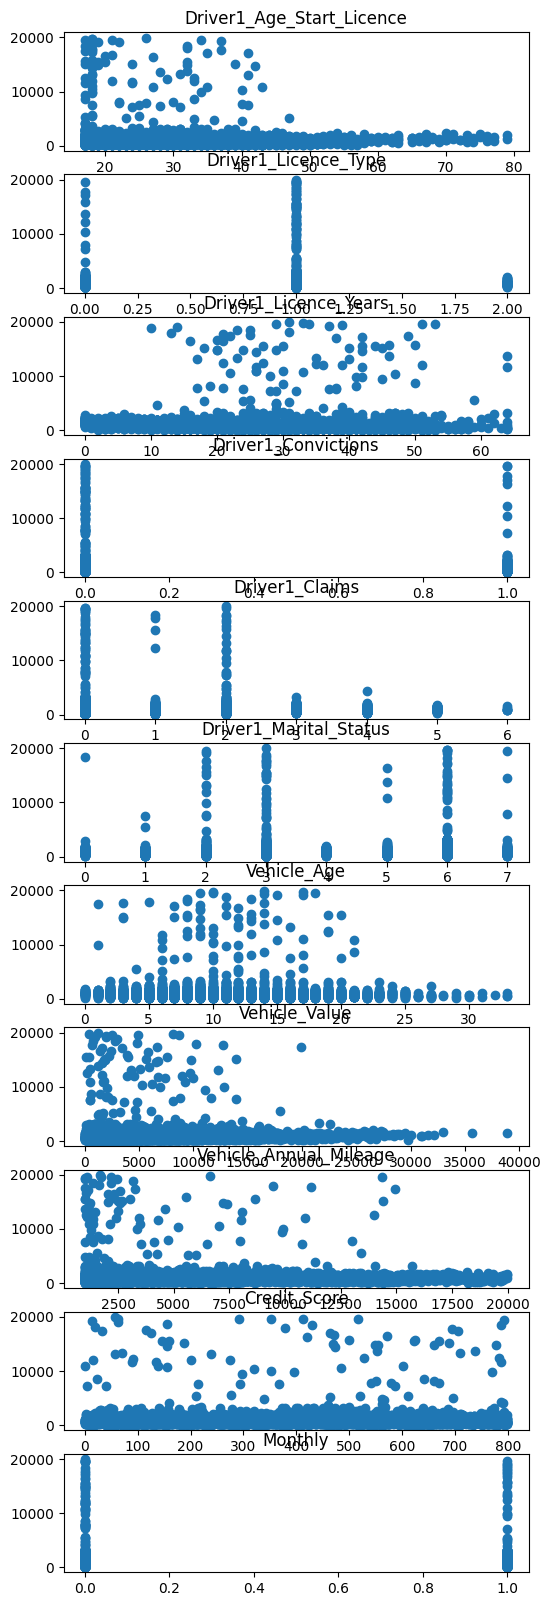

In [32]:
import matplotlib.pyplot as plt
columns = single_drivers.columns
fig,axs = plt.subplots(len(columns)-1, 1, figsize = (6,20))
for i in range(len(columns)-1):
    axs[i].scatter(single_drivers[columns[i]], single_drivers["Premium"], label = columns[i])
    axs[i].set_title(columns[i])

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
single_no_out = single_drivers[np.abs(stats.zscore(single_drivers["Premium"]))<3] #might be better to do it fro each group, but in any case I'm not doing it yet
X,y = single_no_out.iloc[:,:-1], single_no_out.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train.max(), y_test.max()

(5099.9, 5164.55)

In [60]:
regr = RandomForestRegressor(n_estimators=300,max_features=3, max_depth=20, min_samples_leaf=4)
regr.fit(X_train, y_train)
regr.score(X_train, y_train), regr.score(X_test, y_test)

(0.5200576692014345, 0.15115889528694604)